In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [117]:
mpl.rcParams['figure.figsize'] = [12,10]

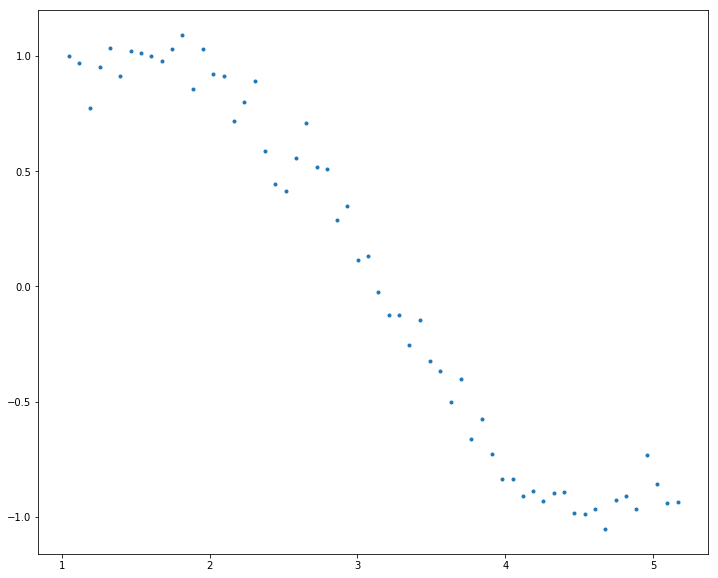

In [118]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.1,len(x))
data=pd.DataFrame({'y':y,'x':x})
plt.plot(x,y,'.')

In [119]:
for i in range(2,16):
    col_name = 'x_%d'%i
    data[col_name] = data['x']**i

In [120]:
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,0.97,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.77,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [121]:
from sklearn.linear_model import LinearRegression

In [131]:
def lin_reg(data,power,models_to_plot) :
    x_values = ['x']
    if power >=2:
        x_values.extend(['x_%d'%i for i in range(2,power+1)])
        
# Model fitting
    model = LinearRegression(normalize=True)
    model.fit(data[x_values],data.y)
    y_pred = model.predict(data[x_values])
    y_pred

# check with plot is to be made for the plots with a given power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.plot(data.x,y_pred)
        plt.plot(data.x,data.y,'.')
        plt.title('Plot for power:%d'%power)

# Return the result in pre-defined format
    rss = sum((y_pred-data.y)**2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

In [132]:
# Test the function
#lin_reg(data,10,[1])

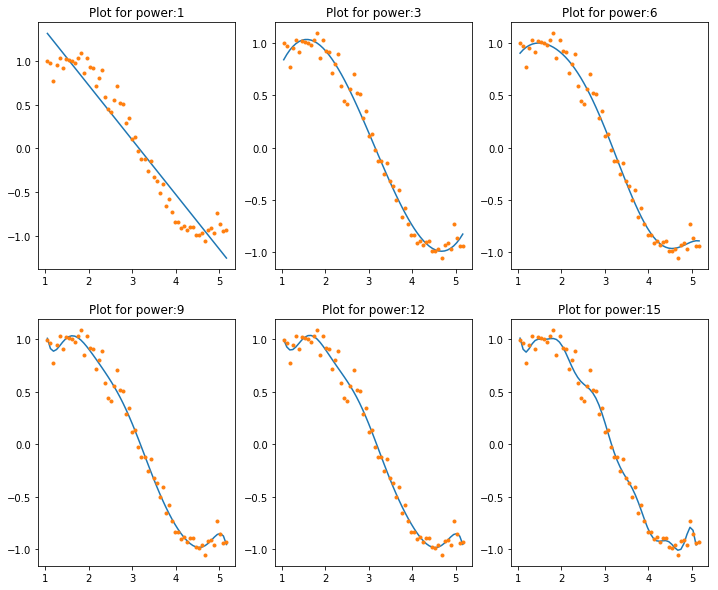

In [134]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#coef_matrix_simple .iloc[i-1,0:i+2]

# Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = lin_reg(data, power=i, models_to_plot=models_to_plot)

In [135]:
# setting the display of data - format as scientific
pd.options.display.float_format = '{:,.2g}'.format

In [106]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,2.6,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,2.6,1.9,-0.57,-0.0082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.5,-1,3,-1.3,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.49,-0.48,2,-0.74,0.015,0.0097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.45,2.1,-3.3,3.4,-1.5,0.26,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.44,-1.8,6.5,-6.3,3.3,-1,0.15,-0.0091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.41,13,-37,46,-30,11,-2.3,0.27,-0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.41,29,-91,1.2e+02,-89,38,-10,1.6,-0.14,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.39,1.1e+02,-4.1e+02,6.4e+02,-5.6e+02,3.1e+02,-1.1e+02,25,-3.5,0.28,-0.0099,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.39,92,-3.2e+02,4.8e+02,-4e+02,2e+02,-58,9.7,-0.54,-0.092,0.017,-0.00088,NaN,NaN,NaN,NaN,NaN


In [107]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\Amit\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.9445201870548606e-17 / 1.1102230246251565e-16
  RuntimeWarning)


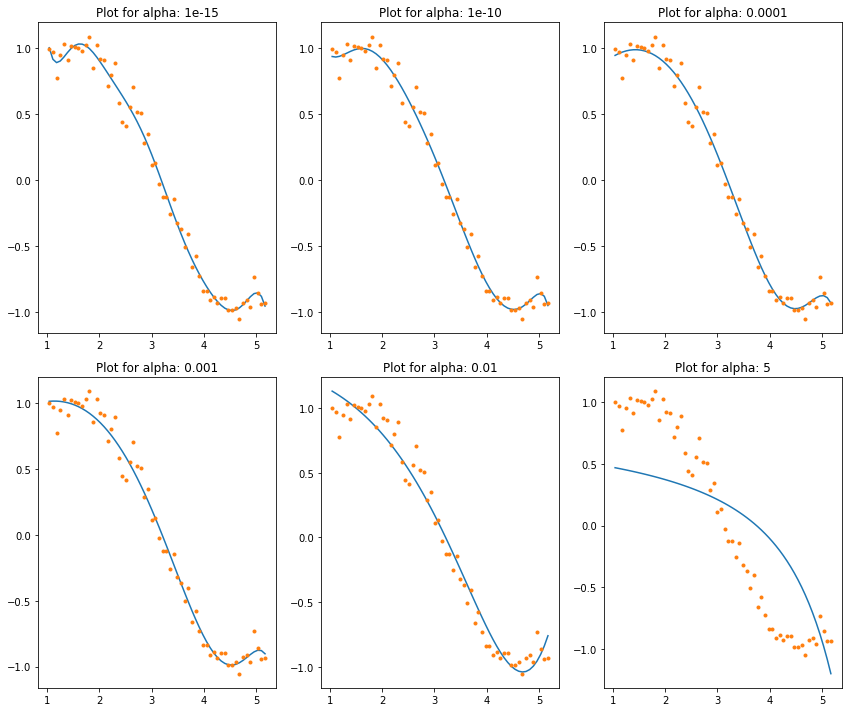

In [109]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [110]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.39,63,-2e+02,2.5e+02,-1.6e+02,44,0.14,-2.9,0.3,0.12,-0.017,-0.0043,0.00068,0.00014,-3.7e-05,2.7e-06,-4.6e-08
alpha_1e-10,0.41,7.4,-19,21,-10,1.9,0.11,-0.061,-0.0072,0.0013,0.00042,1.6e-05,-1.3e-05,-2.8e-06,1.5e-07,1.5e-07,-1.6e-08
alpha_1e-08,0.42,0.85,-0.58,1.1,-0.48,0.026,0.011,0.00024,-0.00024,-3.8e-05,-8.4e-07,6.5e-07,1.3e-07,1.6e-08,3.2e-09,5.8e-10,-3.3e-10
alpha_0.0001,0.43,0.47,0.65,-0.16,-0.029,-0.0024,7.1e-05,7.7e-05,1.9e-05,3.6e-06,5.6e-07,7.3e-08,6.7e-09,-1.4e-10,-3e-10,-1.1e-10,-3.2e-11
alpha_0.001,0.48,0.82,0.31,-0.092,-0.02,-0.0026,-0.00017,2.6e-05,1.3e-05,3.3e-06,6.6e-07,1.1e-07,1.5e-08,1.2e-09,-1.7e-10,-1.2e-10,-4.3e-11
alpha_0.01,0.87,1.3,-0.095,-0.051,-0.0099,-0.0014,-0.00012,1.2e-06,4e-06,1.2e-06,2.8e-07,5.2e-08,8.3e-09,1e-09,4.3e-11,-2.7e-11,-1.3e-11
alpha_1,5,0.96,-0.14,-0.019,-0.003,-0.00046,-7e-05,-9.9e-06,-1.3e-06,-1.5e-07,-1e-08,1.1e-09,7.4e-10,2.3e-10,6e-11,1.4e-11,3.2e-12
alpha_5,13,0.54,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.2e-06,-1.9e-07,-3.2e-08,-5.2e-09,-8.4e-10,-1.3e-10,-2.1e-11,-3.1e-12,-4.5e-13
alpha_10,17,0.39,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.3e-06,-9.3e-07,-1.7e-07,-2.9e-08,-5.2e-09,-9.2e-10,-1.6e-10,-2.9e-11,-5.2e-12,-9.3e-13
alpha_20,22,0.27,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4.1e-09,-7.5e-10,-1.4e-10,-2.6e-11,-4.8e-12,-8.9e-13


In [111]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\Amit\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


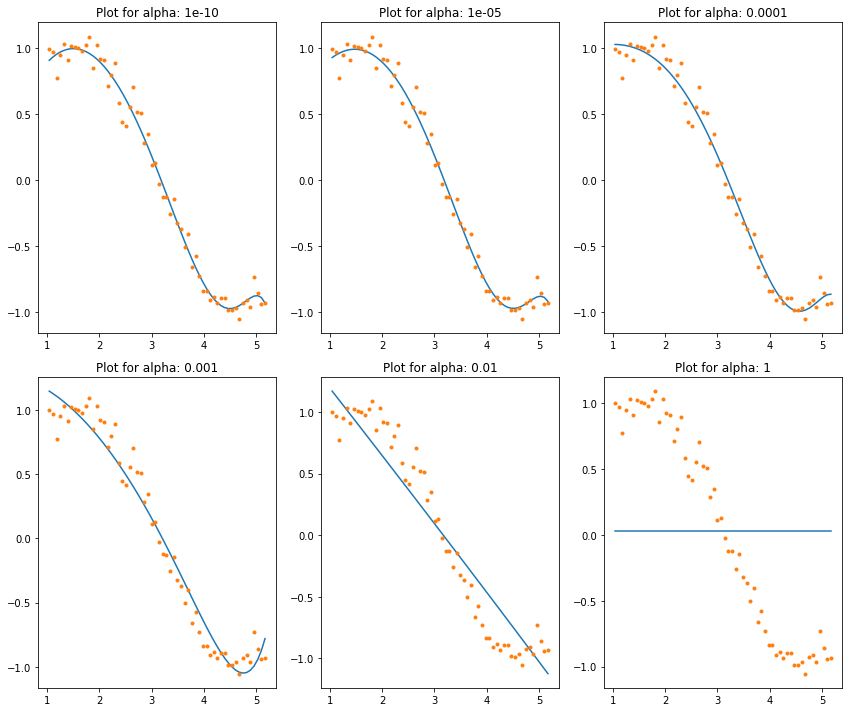

In [112]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [113]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.43,0.031,1.3,-0.43,-0.0048,0.0024,0.00024,-5.5e-08,-7.1e-07,9e-07,4.3e-07,1.1e-07,2.2e-08,3e-09,9.1e-11,-1.2e-10,-5.7e-11
alpha_1e-10,0.43,0.031,1.3,-0.43,-0.0048,0.0024,0.00024,-4.7e-08,-7.1e-07,9e-07,4.3e-07,1.1e-07,2.2e-08,3e-09,9.1e-11,-1.2e-10,-5.7e-11
alpha_1e-08,0.43,0.032,1.3,-0.43,-0.0048,0.0024,0.00024,6.9e-07,-6.2e-07,9e-07,4.2e-07,1.1e-07,2.2e-08,3e-09,1.1e-10,-1.2e-10,-5.7e-11
alpha_1e-05,0.43,0.3,0.89,-0.25,-0.025,-0,0,2.5e-05,3.1e-05,3.9e-06,3.2e-07,0,0,0,-0,-0,-4.3e-11
alpha_0.0001,0.51,0.93,0.14,-0,-0.046,-0,0,0,2e-06,1.1e-05,0,0,0,0,-0,-0,-3.5e-11
alpha_0.001,1.1,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.3e-08,1e-09,0,0,0
alpha_0.01,3,1.7,-0.54,-0.0028,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,36,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
